# Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Loading and Exploring Datasets

In [11]:
# Load the Iris dataset
iris = load_iris()

# Convert to a pandas DataFrame for easier exploration
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first few rows
print(df.head())

# Display the feature names and target names
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


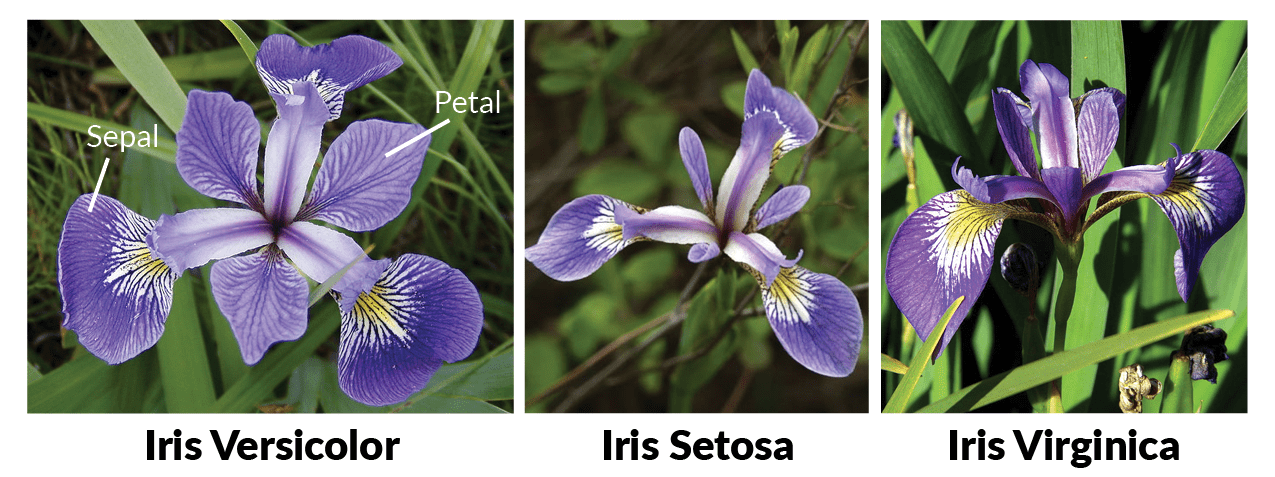

# Splitting the Data into Training and Testing Sets

In [15]:
# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Check the shape of training and testing data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (120, 4)
Testing data shape: (30, 4)


# Data Preprocessing: Scaling the Features

In [17]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data (no fitting here)
X_test_scaled = scaler.transform(X_test)

- fit_transform changes the internal variables/computation inside the scaler
- transform only transforms the data, not changing the internal variables

# Model Training: Logistic Regression

In [23]:
# Create a Logistic Regression classifier
log_reg = LogisticRegression(max_iter=200)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test set: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



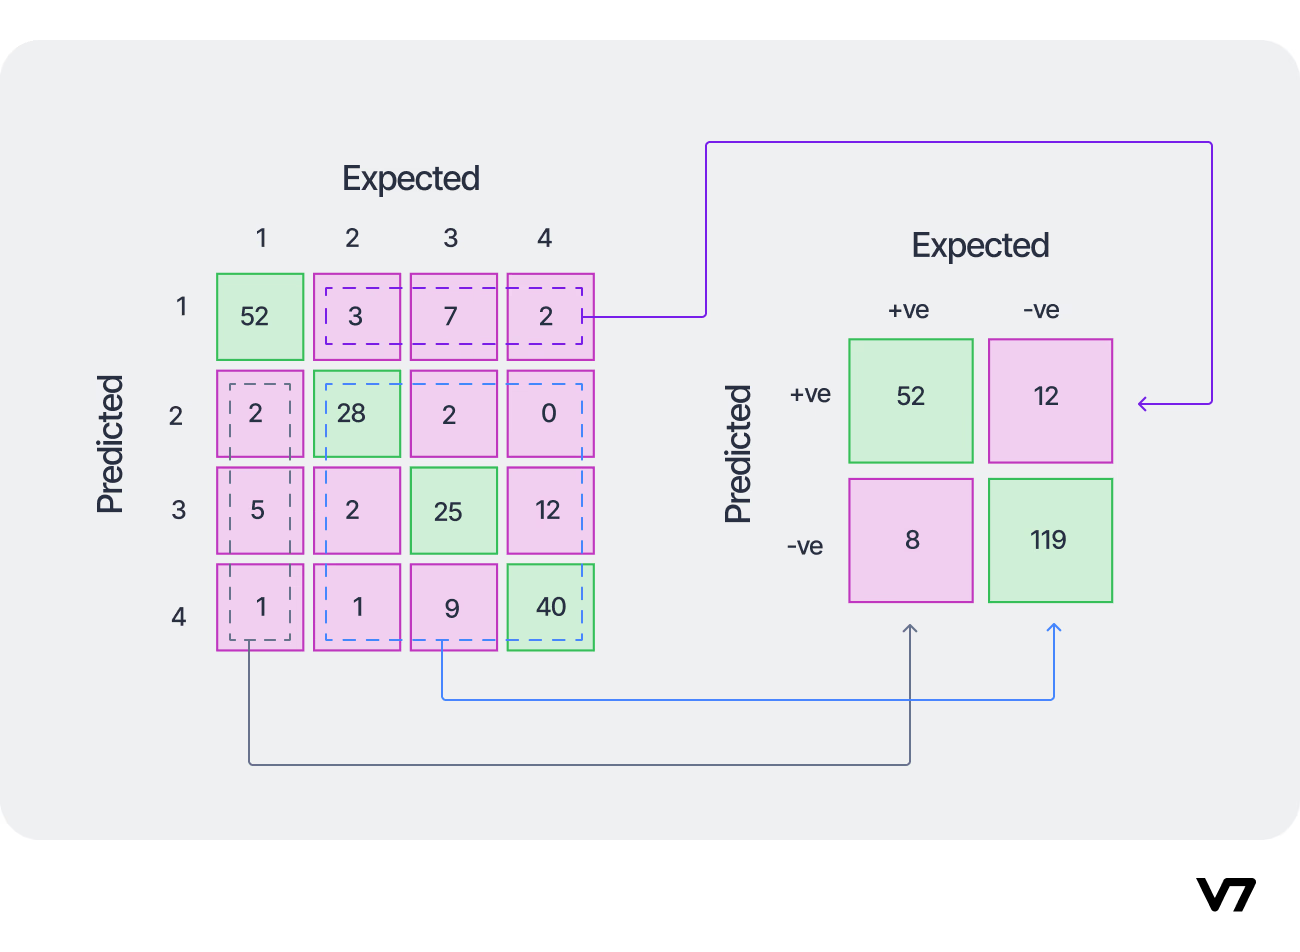

# Model Training: Random Forest Classifier

In [25]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Accuracy on test set:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy on test set: 1.0
Random Forest Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Model Hyperparameter Tuning with GridSearchCV

In [29]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best parameters from GridSearchCV:", grid_search.best_params_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)
print("Best Random Forest Accuracy on test set:", accuracy_score(y_test, y_pred_best_rf))

Best parameters from GridSearchCV: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest Accuracy on test set: 1.0


# Creating a Pipeline

In [31]:
# Create a pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_pipeline = pipeline.predict(X_test)

# Evaluate the model
print("Pipeline Accuracy on test set:", accuracy_score(y_test, y_pred_pipeline))

Pipeline Accuracy on test set: 1.0


The make_pipeline() function from sklearn.pipeline can only accept transformers and estimators that follow scikit-learn’s API

- Transformers (Preprocessing Steps)
  - Classes that have a .fit() and .transform() method
  - Used for feature scaling, encoding, or other preprocessing tasks.
  - Examples: StandardScaler(), MinMaxScaler(), OneHotEncoder(), PCA()
- Estimators (Final Predictive Model)
  - Classes that have a .fit() and .predict() method
  - Used for training and making predictions
  - Examples: LogisticRegression(), RandomForestClassifier(), SVC()

# Visualizing the Model Performance

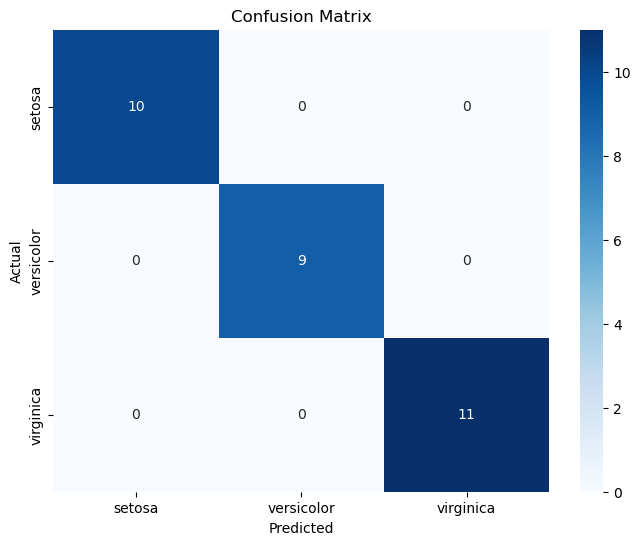

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Saving and Loading the Model

In [35]:
import joblib

# Save the model to a file
joblib.dump(log_reg, 'logistic_regression_model.pkl')

# Load the model from the file
loaded_model = joblib.load('logistic_regression_model.pkl')

# Predict with the loaded model
y_pred_loaded = loaded_model.predict(X_test_scaled)
print("Loaded model accuracy:", accuracy_score(y_test, y_pred_loaded))

Loaded model accuracy: 1.0
